Банки хранят огромные объёмы информации о своих клиентах. Эти данные можно использовать для того, чтобы оставаться на связи с клиентами и индивидуально ориентировать их на подходящие именно им продукты или банковские предложения.

Обычно с выбранными клиентами связываются напрямую через разные каналы связи: лично (например, при визите в банк), по телефону, по электронной почте, в мессенджерах и так далее. Этот вид маркетинга называется прямым маркетингом. На самом деле, прямой маркетинг используется для взаимодействия с клиентами в большинстве банков и страховых компаний. Но, разумеется, проведение маркетинговых кампаний и взаимодействие с клиентами — это трудозатратно и дорого.

→ Банкам хотелось бы уметь выбирать среди своих клиентов именно тех, которые с наибольшей вероятностью воспользуются тем или иным предложением, и связываться именно с ними.

Вам предоставили данные о последней маркетинговой кампании, которую проводил банк: задачей было привлечь клиентов для открытия депозита. Вы должны проанализировать эти данные, выявить закономерность и найти решающие факторы, повлиявшие на то, что клиент вложил деньги именно в этот банк. Если вы сможете это сделать, то поднимете доходы банка и поможете понять целевую аудиторию, которую необходимо привлекать путём рекламы и различных предложений.

Бизнес-задача: определить характеристики, по которым можно выявить клиентов, более склонных к открытию депозита в банке, и за счёт этого повысить результативность маркетинговой кампании.

Техническая задача для вас как для специалиста в Data Science: построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать, воспользуется он предложением об открытии депозита или нет.

Проект будет состоять из пяти частей:

1
Первичная обработка данных

В рамках этой части вам предстоит обработать пропуски и выбросы в данных. Это необходимо для дальнейшей работы с ними.

2
Разведывательный анализ данных (EDA)

Вам необходимо будет исследовать данные, нащупать первые закономерности и выдвинуть гипотезы.

3
Отбор и преобразование признаков

На этом этапе вы перекодируете и преобразуете данные таким образом, чтобы их можно было использовать при решении задачи классификации. Если на первом этапе вы лишь избавите данные от ненужных артефактов, то на этом шаге совершите действия, более важные для подготовки данных к задаче классификации, уже понимая их структуру.

4
Решение задачи классификации: логистическая регрессия и решающие деревья

На данном этапе вы построите свою первую прогностическую модель и оцените её качество. Вы научитесь подбирать оптимальные параметры модели для того, чтобы получить наилучший результат для конкретного алгоритма.

5
Решение задачи классификации: ансамбли моделей и построение прогноза

На заключительном этапе вы сможете доработать своё предсказание с использованием более сложных алгоритмов и оценить, с помощью какой модели возможно сделать более качественные прогнозы.

# Проект: классификация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing  import LabelEncoder
from sklearn import linear_model 
from sklearn import tree 
from sklearn import ensemble 
from sklearn import metrics 
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import SelectKBest, f_classif

## Часть 1. Знакомство с данными, обработка пропусков и выбросов

### Задание 1

In [2]:
df = pd.read_csv('bank_fin.csv', sep = ';')

In [3]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,"2 343,00 $",yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,"45,00 $",no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,"1 270,00 $",yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,"2 476,00 $",yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,"184,00 $",no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,"1,00 $",yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,"733,00 $",no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,"29,00 $",no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0 $,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11137 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(6), object(11)
memory usage: 1.4+ MB


In [5]:
df.describe()

,age,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [3]:
# исследуйте данные на предмет пропусков. Где есть пропущенные значения? Сколько их?
# ваш код
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance      25
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

### Задание 2

In [5]:
# есть ли в признаке job пропущенные значения? Возможно, они обозначены каким-то специальным словом?
# ваш код
df.describe(include='object')

,job,marital,education,default,balance,housing,loan,contact,month,poutcome,deposit
count,11162,11162,11162,11162,11137,11162,11162,11162,11162,11162,11162
unique,12,3,4,2,3802,2,2,3,12,4,2
top,management,married,secondary,no,0 $,no,no,cellular,may,unknown,no
freq,2566,6351,5476,10994,774,5881,9702,8042,2824,8326,5873


In [6]:
df['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

### Задание 3

In [4]:
# преобразуйте признак balance таким образом, чтобы он корректно считывался, как вещественное число (float)
df['balance'] = df['balance'].str.strip(' $')
df['balance'] = df['balance'].str.replace(' ', '')
df['balance'] = df['balance'].str.replace(',', '.')

In [5]:
# преобразуем признак balance во float
df = df.astype({'balance': np.float})

In [6]:
round(df['balance'].mean(), 3)

1529.129

### Задание 4

In [7]:
df['balance'].median()

550.0

In [8]:
# обработайте пропуски в признаки balance , заменив их на медианные значения по данному признаку
df['balance'] = df['balance'].fillna(df['balance'].median())

In [9]:
round(df['balance'].mean(), 3)

1526.936

### Задание 5

In [10]:
# обработайте пропуски в категориальных признаках: job и education, заменив их на модальные значения
job_mode = df['job'].mode()[0]
print(job_mode)
educ_mode = df['education'].mode()[0]
print(educ_mode)

df['job'] = df['job'].apply(lambda x : job_mode if x == 'unknown' else x)
df['education'] = df['education'].apply(lambda x : educ_mode if x == 'unknown' else x)

management
secondary


In [11]:
round(df['balance'][(df['job'] == 'management') & (df['education'] == 'secondary')].mean(), 3)

1598.883

### Задание 6

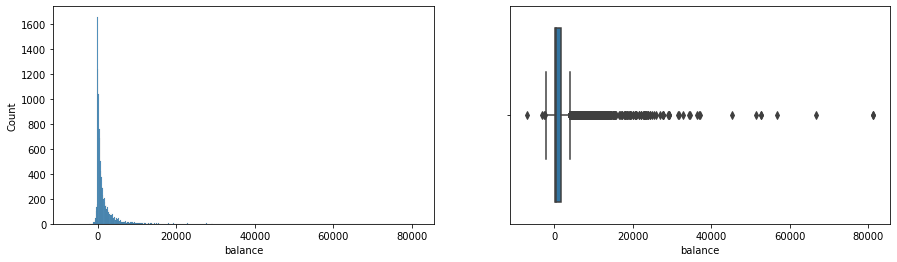

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=df, x='balance', ax=axes[0]);
boxplot = sns.boxplot(data=df, x='balance', ax=axes[1]);

In [13]:
quartile_1, quartile_3 = df['balance'].quantile(0.25), df['balance'].quantile(0.75),
iqr = quartile_3 - quartile_1
lower_bound = quartile_1 - (iqr * 1.5)
upper_bound = quartile_3 + (iqr * 1.5)
print('Нижняя граница lower_bound =', lower_bound)
print('Верхняя граница upper_bound =', upper_bound)

Нижняя граница lower_bound = -2241.0
Верхняя граница upper_bound = 4063.0


In [14]:
# удалите все выбросы для признака balance
def outliers_iqr(data, feature):
    x = data[feature]
    quartile_1, quartile_3 = x.quantile(0.25), x.quantile(0.75),
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    outliers = data[(x<=lower_bound) | (x >= upper_bound)] # тут были < и > условия, строгое неравенство и ответ получался другой
    cleaned = data[(x>=lower_bound) & (x <= upper_bound)]
    return outliers, cleaned


outliers, cleaned = outliers_iqr(df, 'balance')
print(f'Число выбросов по методу Тьюки: {outliers.shape[0]}')
print(f'Результирующее число записей: {cleaned.shape[0]}')

Число выбросов по методу Тьюки: 1058
Результирующее число записей: 10105


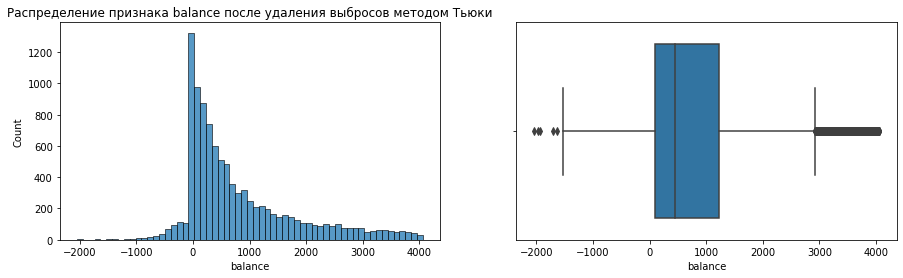

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
histplot = sns.histplot(data=cleaned, x='balance', ax=axes[0]);
boxplot = sns.boxplot(data=cleaned, x='balance', ax=axes[1])
histplot.set_title('Распределение признака balance после удаления выбросов методом Тьюки');

In [16]:
cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343.0,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45.0,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270.0,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476.0,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184.0,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1.0,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733.0,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29.0,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0.0,no,yes,cellular,8,may,9,2,172,5,failure,no


## Часть 2:  Разведывательный анализ

### Задание 1

no     5424
yes    4681
Name: deposit, dtype: int64

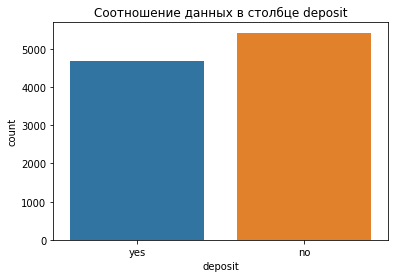

In [17]:
# изучите соотношение классов в ваших данных на предмет несбалансированности, проиллюстрируйте результат
display(cleaned['deposit'].value_counts())
pct1 = sns.countplot(data=cleaned, x='deposit')
pct1.set_title('Соотношение данных в столбце deposit');

### Задания 2 и 3

In [37]:
#рассчитайте описательные статистики для количественных переменных, проинтерпретируйте результат
cleaned.describe()

,age,balance,day,duration,campaign,pdays,previous
count,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000,10105.000000
mean,40.895497,807.653538,15.590302,368.742603,2.517170,51.319644,0.816230
std,11.734931,994.151966,8.441510,346.651524,2.707159,109.644179,2.243795
min,18.000000,-2049.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,95.000000,8.000000,137.000000,1.000000,-1.000000,0.000000
50%,38.000000,445.000000,15.000000,252.000000,2.000000,-1.000000,0.000000
75%,48.000000,1227.000000,22.000000,490.000000,3.000000,2.000000,1.000000
max,95.000000,4063.000000,31.000000,3881.000000,43.000000,854.000000,58.000000


### Задания 4 и 5

In [38]:
#рассчитайте описательные статистики для категориальных переменных, проинтерпретируйте результат
#ваш код
#постройте визуализации, иллюстрирующие результаты
cleaned.describe(include='object')

,job,marital,education,default,housing,loan,contact,month,poutcome,deposit
count,10105,10105,10105,10105,10105,10105,10105,10105,10105,10105
unique,11,3,3,2,2,2,3,12,4,2
top,management,married,secondary,no,no,no,cellular,may,unknown,no
freq,2315,5715,5517,9939,5243,8712,7283,2617,7570,5424


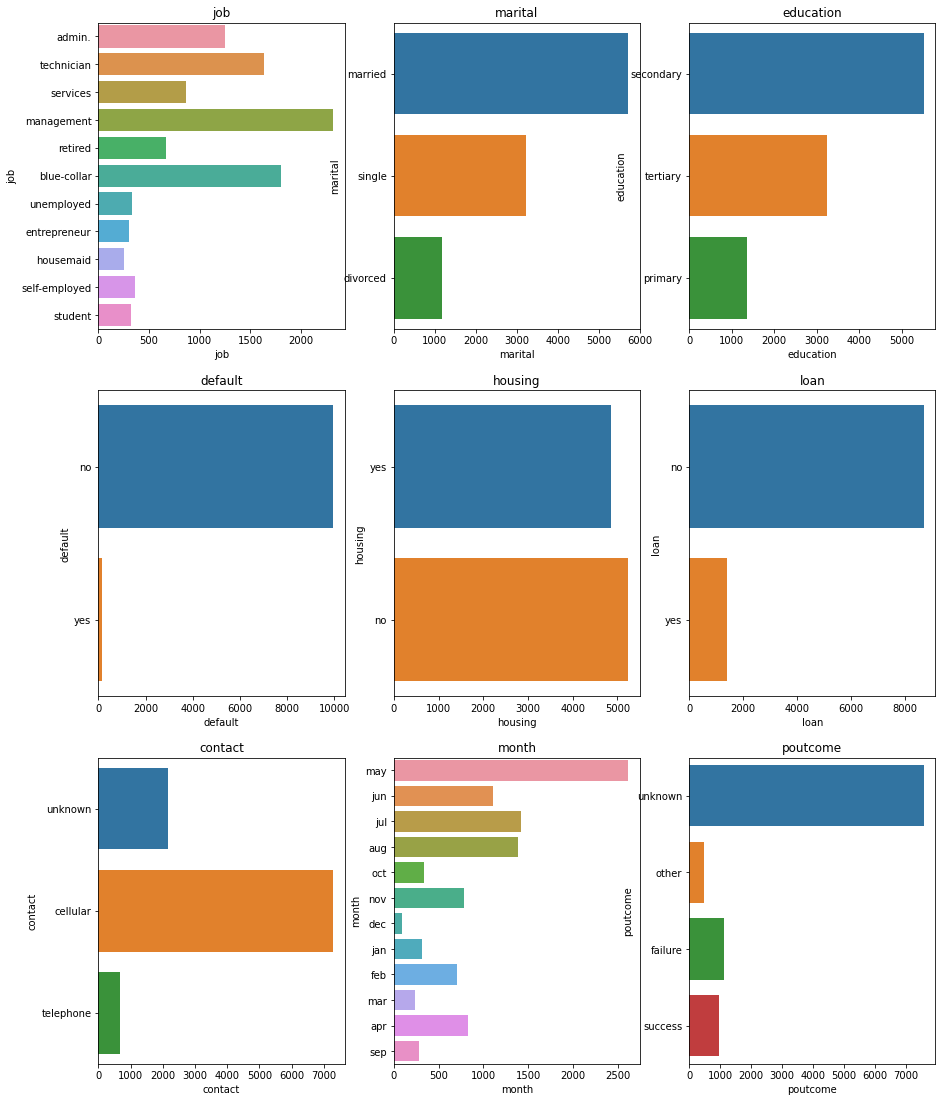

In [41]:
categorical_features=[feature for feature in cleaned.columns if ((cleaned[feature].dtypes=='O') & (feature not in ['deposit']))]
#import matplotlib.pyplot as plt
plt.figure(figsize=(15,80), facecolor='white')
plotnumber =1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=cleaned)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

### Задание 6

Подсказка (1 из 1): Сгруппируйте данные по признаку, который отвечает за предыдущую кампанию (poutcome), и примените метод value_counts().

In [18]:
cleaned.groupby('poutcome')['deposit'].value_counts()

poutcome  deposit
failure   no          562
          yes         547
other     yes         265
          no          216
success   yes         861
          no           84
unknown   no         4562
          yes        3008
Name: deposit, dtype: int64

deposit,no,yes
poutcome,,
failure,562,547
other,216,265
success,84,861
unknown,4562,3008


<AxesSubplot:xlabel='poutcome'>

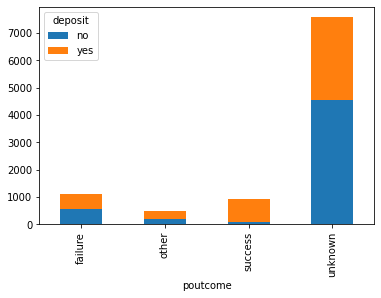

In [19]:
# Узнайте, для какого статуса предыдущей маркетинговой кампании успех в текущей превалирует над количеством неудач.
pct2 = cleaned.groupby('poutcome')['deposit'].value_counts(normalize=False).unstack()
display(pct2)
pct2.plot(kind='bar', stacked='True')

### Задание 7

In [20]:
# узнайте, в каком месяце чаще всего отказывались от предложения открыть депозит
cleaned.groupby(['month'])['deposit'].value_counts().sort_values()

month  deposit
dec    no            9
mar    no           24
sep    no           46
oct    no           62
dec    yes          84
jan    yes         125
       no          194
mar    yes         213
sep    yes         232
oct    yes         273
apr    no          317
feb    no          323
nov    yes         324
feb    yes         386
nov    no          456
jun    yes         498
apr    yes         513
jul    yes         582
jun    no          606
aug    yes         610
       no          775
jul    no          836
may    yes         841
       no         1776
Name: deposit, dtype: int64

### Задание 8

In [21]:
# создайте возрастные группы и определите, в каких группах более склонны открывать депозит, чем отказываться от предложения
def age_group (arg):
    if arg < 30: res = '<30'
    elif 30 <= arg <= 40 : res = '30-40'
    elif 40 <= arg <= 50 : res = '40-50'
    elif 50 <= arg <= 60 : res = '50-60'
    elif arg > 60 : res = '60+'
    return res

cleaned['age_group'] = cleaned['age'].apply(age_group)

30-40    4257
40-50    2255
50-60    1625
<30      1455
60+       513
Name: age_group, dtype: int64

<AxesSubplot:xlabel='age_group', ylabel='count'>

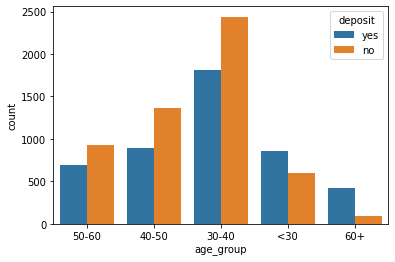

In [22]:
display(cleaned['age_group'].value_counts())
sns.countplot(x="age_group", hue="deposit", data=cleaned)

### Задания 9 и 10

<AxesSubplot:xlabel='count', ylabel='marital'>

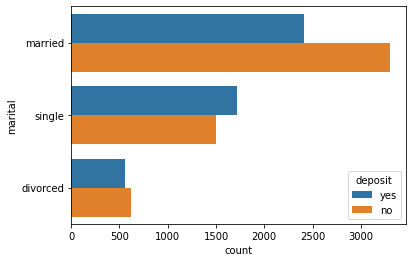

In [23]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от семейного статуса
sns.countplot(y='marital', hue='deposit', data=cleaned)

<AxesSubplot:xlabel='count', ylabel='education'>

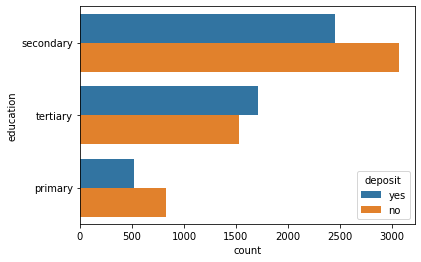

In [24]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от образования
sns.countplot(y='education', hue='deposit', data=cleaned)

<AxesSubplot:xlabel='count', ylabel='job'>

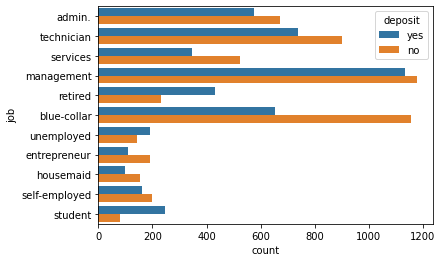

In [25]:
# постройте визуализации для открывших и неоткрывших депозит в зависимости от вида профессиональной занятости
sns.countplot(y='job', hue='deposit', data=cleaned)

### Задание 11

In [26]:
# постройте сводную таблицу, чтобы определить люди с каким образованием и семейным статусом наиболее многочисленны
#(если рассматривать тех, кто открыл депозит)
display(pd.crosstab(cleaned.deposit, cleaned.marital))
display(pd.crosstab(cleaned.deposit, cleaned.education))

depo_yes = cleaned['deposit'] == 'yes'
depo_no = cleaned['deposit'] == 'no'

# оставим только тех, кто открыл депозит
pt1 = cleaned[depo_yes][['education','marital','deposit']] # сводная таблица по маске 1, для тех, кто открыл депозит 
res = pd.crosstab(pt1['education'],pt1['marital'])

marital,divorced,married,single
deposit,,,
no,624,3303,1497
yes,553,2412,1716


education,primary,secondary,tertiary
deposit,,,
no,832,3066,1526
yes,517,2451,1713


<AxesSubplot:xlabel='marital', ylabel='education'>

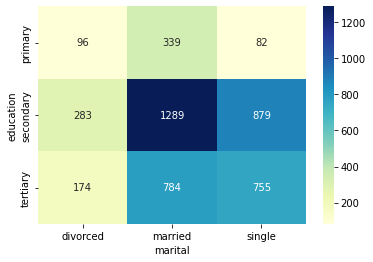

In [27]:
# тепловая карта в разрезе берущих депозит клиентов банка
sns.heatmap(res, # полученная раннее сводная таблица, показывающая семейн положение и образование клиентов, берущих депозит 'yes'
            cmap="YlGnBu",
            annot=True,
            fmt='.4g')

## Часть 3: преобразование данных

### Задание 1

In [28]:
# преобразуйте уровни образования
# Создание экземпляра класса LabelEncoder()
lab_enc = LabelEncoder()

# Кодирование признака
cleaned['education'] = lab_enc.fit_transform(cleaned['education'])

cleaned['education'].sum()

11995

### Задания 2 и 3

In [29]:
# преобразуйте бинарные переменные в представление из нулей и единиц
# преобразуем порядковую переменную для возраста
cleaned['age_group'] = lab_enc.fit_transform(cleaned['age_group'])

cleaned['deposit'] = cleaned['deposit'].apply(lambda x : 1 if x == 'yes' else 0)

In [30]:
round(cleaned['deposit'].std(), 3)

0.499

In [31]:
cleaned['default'] = cleaned['default'].apply(lambda x : 1 if x == 'yes' else 0)
cleaned['housing'] = cleaned['housing'].apply(lambda x : 1 if x == 'yes' else 0)
cleaned['loan'] = cleaned['loan'].apply(lambda x : 1 if x == 'yes' else 0)

In [32]:
round(cleaned['default'].mean() + cleaned['housing'].mean() + cleaned['loan'].mean(), 3)

0.635

### Задание 4

In [33]:
# создайте дамми-переменные
categorial_features = ['job', 'marital', 'contact', 'month', 'poutcome']
cd= pd.get_dummies(cleaned[categorial_features])
cleaned = pd.concat([cleaned,cd], axis = 1)

cleaned

,age,job,marital,education,default,balance,housing,loan,contact,day,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,59,admin.,married,1,0,2343.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
1,56,admin.,married,1,0,45.0,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
2,41,technician,married,1,0,1270.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
3,55,services,married,1,0,2476.0,1,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
4,54,admin.,married,2,0,184.0,0,0,unknown,5,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,0,0,1.0,1,0,cellular,20,...,0,0,0,0,0,0,0,0,0,1
11158,39,services,married,1,0,733.0,0,0,unknown,16,...,1,0,0,0,0,0,0,0,0,1
11159,32,technician,single,1,0,29.0,0,0,cellular,19,...,0,0,0,0,0,0,0,0,0,1
11160,43,technician,married,1,0,0.0,0,1,cellular,8,...,0,0,1,0,0,0,1,0,0,0


### Задания 5 и 6

<AxesSubplot:>

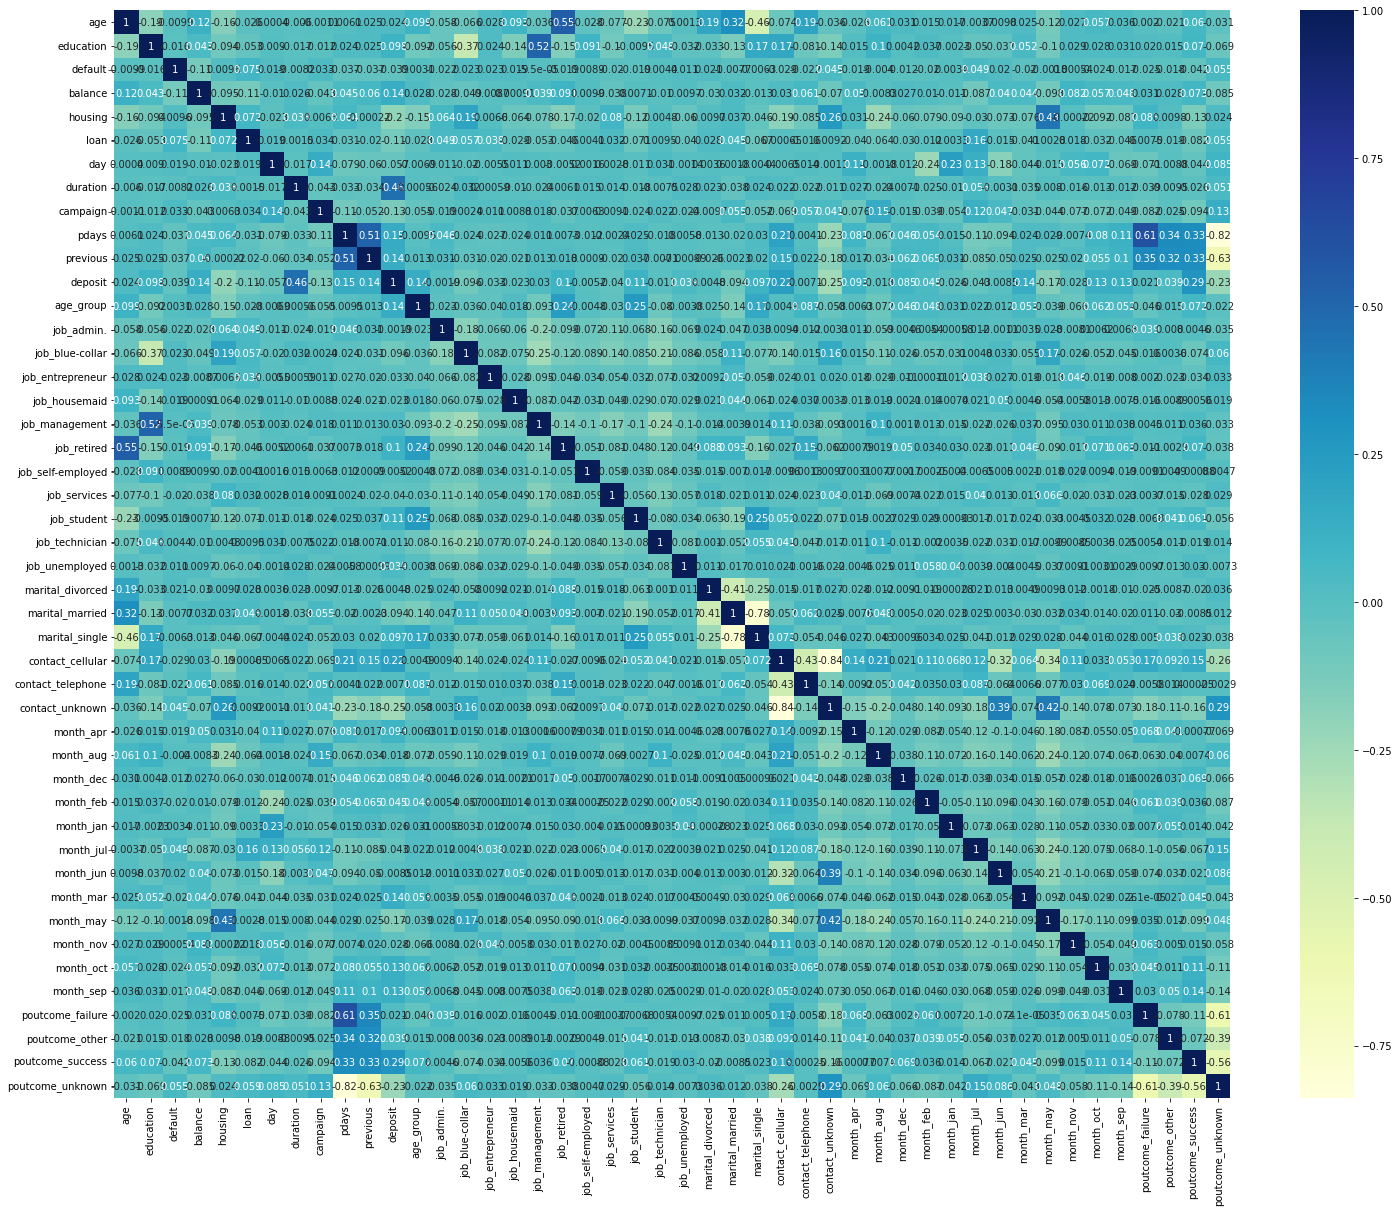

In [34]:
# постройте корреляционную матрицу и оцените данные на предмет наличия мультиколлинеарности
fig, ax = plt.subplots(figsize=(25, 20))
#corr = cleaned.corr()
sns.heatmap(cleaned.corr(),
            cmap="YlGnBu",
            annot=True,
            #fmt='.4g'
            )

In [35]:
corr = cleaned.corr()
new_corr = corr['deposit'].reset_index()
sort_corr = new_corr.sort_values('deposit', ascending=False)
sort_corr.head()

,index,deposit
11,deposit,1.000000
7,duration,0.457818
44,poutcome_success,0.288491
27,contact_cellular,0.223944
9,pdays,0.147917


In [36]:
cleaned['age'].corr(cleaned['age_group'], method = 'pearson') #  kendall spearman

0.09889240538774632

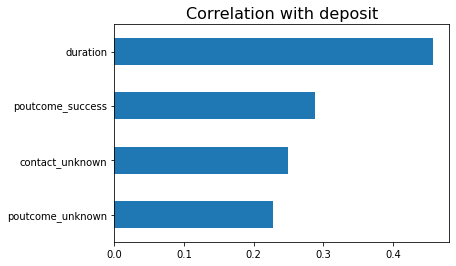

In [37]:
corr["deposit"].apply(lambda x: abs(x)).sort_values()[-5:-1].plot.barh()
plt.title("Correlation with deposit", fontsize = 16)
plt.show()

<AxesSubplot:>

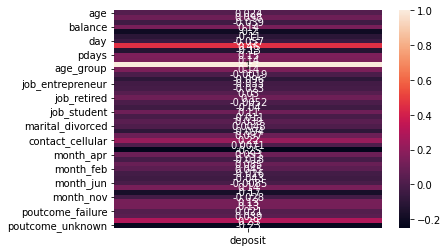

In [59]:
# еще один вариант решения задания "В качестве дополнения визуализации к этому заданию постройте 
# столбчатую диаграмму для ранжированных коэффициентов корреляции". Но тут будет нестолбчатая
sns.heatmap(cleaned.corr()[['deposit']], annot=True)

### Задания 7 и 8

In [40]:
cleaned = cleaned.drop(['job', 'marital', 'contact', 'month', 'poutcome'], axis=1)

In [41]:
X = cleaned.drop(['deposit'], axis=1)
y = cleaned['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [42]:
# рассчитайте необходимые показатели
print(y_test.shape)
print(y_test.mean())

(3335,)
0.46326836581709147


### Задание 9

In [43]:
# с помощью SelectKBest отберите 15 наиболее подходящих признаков
selector = SelectKBest(f_classif, k=15)
selector.fit(X_train, y_train)
selector.get_feature_names_out()

array(['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'], dtype=object)

### Задание 10

In [45]:
# создадим датафрейм с отобранными SelectKBest признаками + deposit
selectkbest_df = cleaned[['balance', 'housing', 'duration', 'campaign', 'pdays', 'previous',
       'age_group', 'contact_cellular', 'contact_unknown', 'month_mar',
       'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown', 'deposit']]

selectkbest_df

,balance,housing,duration,campaign,pdays,previous,age_group,contact_cellular,contact_unknown,month_mar,month_may,month_oct,month_sep,poutcome_success,poutcome_unknown,deposit
0,2343.0,1,1042,1,-1,0,2,0,1,0,1,0,0,0,1,1
1,45.0,0,1467,1,-1,0,2,0,1,0,1,0,0,0,1,1
2,1270.0,1,1389,1,-1,0,1,0,1,0,1,0,0,0,1,1
3,2476.0,1,579,1,-1,0,2,0,1,0,1,0,0,0,1,1
4,184.0,0,673,2,-1,0,2,0,1,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,1.0,1,257,1,-1,0,0,1,0,0,0,0,0,0,1,0
11158,733.0,0,83,4,-1,0,0,0,1,0,0,0,0,0,1,0
11159,29.0,0,156,2,-1,0,0,1,0,0,0,0,0,0,1,0
11160,0.0,0,9,2,172,5,1,1,0,0,1,0,0,0,0,0


In [46]:
X = selectkbest_df.drop(['deposit'], axis=1)
y = selectkbest_df['deposit']
 
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 42, test_size = 0.33)

In [47]:
# нормализуйте данные с помощью minmaxsxaler
scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
print(X_test_scaled[:, 0].mean())  # для признака balance

0.46823674223097866


# Часть 4: Решение задачи классификации: логистическая регрессия и решающие деревья

### Задание 1

In [51]:
# обучите логистическую регрессию и рассчитайте метрики качества
log_reg = linear_model.LogisticRegression(random_state=42, solver='sag', max_iter=1000)

log_reg.fit(X_train_scaled, y_train)
y_train_pred = log_reg.predict(X_train_scaled)

print(metrics.classification_report(y_train, y_train_pred))

y_test_pred = log_reg.predict(X_test_scaled)

print(metrics.classification_report(y_test, y_test_pred))
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84      3634
           1       0.84      0.76      0.80      3136

    accuracy                           0.83      6770
   macro avg       0.83      0.82      0.82      6770
weighted avg       0.83      0.83      0.82      6770

              precision    recall  f1-score   support

           0       0.79      0.87      0.83      1790
           1       0.83      0.74      0.78      1545

    accuracy                           0.81      3335
   macro avg       0.81      0.80      0.80      3335
weighted avg       0.81      0.81      0.81      3335

Test accuracy: 0.81


### Задания 2,3,4

In [52]:
# обучите решающие деревья, настройте максимальную глубину
dt = tree.DecisionTreeClassifier(criterion='entropy', random_state=42)
dt.fit(X_train_scaled, y_train)
y_train_pred = dt.predict(X_train_scaled)

print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = dt.predict(X_test_scaled)

print('Test: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Train: 1.00
Test: 0.75


Переберите различные максимальные глубины деревьев и найдите глубину дерева, для которой будет максимальное значение метрики accuracy.

In [60]:
from sklearn.model_selection import RandomizedSearchCV

In [68]:
# найду максим глубину дерева с помощью метода RandomizedSearchCV
parameters =  {'max_depth':[3,5,6,7,8,9,10,15]}
rscv = RandomizedSearchCV(estimator=dt,
                          param_distributions=parameters)
rscv.fit(X_train_scaled, y_train)

print("Наилучшие значения параметров: {}".format(rscv.best_params_))
y_train_pred = rscv.predict(X_train_scaled)
y_test_pred = rscv.predict(X_test_scaled)

print('accuracy_score на y_train_pred наборе: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))
print('accuracy_score на тестовом наборе: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'max_depth': 9}
accuracy_score на y_train_pred наборе: 0.85
accuracy_score на тестовом наборе: 0.81


Перебирая параметр max_depth с помощью RandomizedSearchCV, у меня получилось Наилучшее значение = 9.
Платформа на курсе принимает значение "6"!

### Задание 5

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
# подберите оптимальные параметры с помощью gridsearch
parameters =  {'min_samples_split': [2, 5, 7, 10], 'max_depth':[3,5,7]}
gscv = GridSearchCV(tree.DecisionTreeClassifier(), parameters,
                    cv=3, scoring=('f1'), return_train_score=True)
gscv.fit(X_train_scaled, y_train)

print("Наилучшие значения параметров: {}".format(gscv.best_params_))

y_test_pred = gscv.predict(X_test_scaled)

print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Наилучшие значения параметров: {'max_depth': 7, 'min_samples_split': 2}
f1_score на тестовом наборе: 0.80


# Часть 5: Решение задачи классификации: ансамбли моделей и построение прогноза

### Задание 1

In [73]:
# обучите на ваших данных случайный лес
rf = ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)
#Обучаем модель
rf.fit(X_train_scaled, y_train)

#Выводим значения метрики 
y_train_pred = rf.predict(X_train_scaled)
print('Train: {:.2f}'.format(metrics.accuracy_score(y_train, y_train_pred)))

y_test_pred = rf.predict(X_test_scaled)
print('Test accuracy: {:.2f}'.format(metrics.accuracy_score(y_test, y_test_pred)))
print()
print('Train recall_score: {:.2f}'.format(metrics.recall_score(y_train, y_train_pred)))
print('Test recall_score: {:.2f}'.format(metrics.recall_score(y_test, y_test_pred)))

print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.86
Test accuracy: 0.83

Train recall_score: 0.86
Test recall_score: 0.83
Test f1_score: 0.82


In [ ]:
# эти значения принимает платформа
# accuracy = 0.83
# recall =  0.84

### Задания 2 и 3

In [72]:
# используйте для классификации градиентный бустинг и сравните качество со случайным лесом
gb = ensemble.GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    min_samples_leaf=5,
    max_depth=5,
    random_state=42
)
gb.fit(X_train_scaled, y_train)

y_train_pred = gb.predict(X_train_scaled)
print('Train f1_score: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))

y_test_pred = gb.predict(X_test_scaled)
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Train: 0.88
Test: 0.81


In [ ]:
# на платформе опять косяк f1_score = 0.82
# и просят указать какая модель даёт более качественный прогноз (если посмотреть известные вам метрики в целом) - 
# и это у них на платформе Случайный лес, а у меня получился Градиентный бустинг

### Задание 4

In [74]:
# объедините уже известные вам алгоритмы с помощью стекинга 
# объединяем решающие деревья, логистическую регрессию и градиентный бустинг. В качестве метамодели final_estimator используйте модель логистической регрессии.
estimators = [
    ('dt', tree.DecisionTreeClassifier(
        criterion='entropy',
        min_samples_leaf=5,
        max_depth=6,
        random_state=42
        )
    ),
    ('log_reg', linear_model.LogisticRegression(
        solver='sag',
        random_state=42 
        )
    ),
    ('gb', ensemble.GradientBoostingClassifier(
        learning_rate=0.05,
        n_estimators=300,
        min_samples_leaf=5,
        max_depth=5,
        random_state=42
        )
    )
]

stack = ensemble.StackingClassifier(
    estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42)
)
stack.fit(X_train_scaled, y_train)

y_train_pred = stack.predict(X_train_scaled)
#print('Train: {:.2f}'.format(metrics.precision(y_train, y_train_pred)))
y_test_pred = stack.predict(X_test_scaled)
#print('Test: {:.2f}'.format(metrics.precision(y_test, y_test_pred)))

print(metrics.classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83      1790
           1       0.81      0.81      0.81      1545

    accuracy                           0.82      3335
   macro avg       0.82      0.82      0.82      3335
weighted avg       0.82      0.82      0.82      3335



In [ ]:
# на платформе precision = 0.82

In [75]:
# еще один вариант скопирую. тут в tree.DecisionTreeClassifier нет min_samples_leaf=5
estimators = [
('dtc', tree.DecisionTreeClassifier(
    criterion='entropy', 
    random_state=42, 
    max_depth=6)),
('rf', ensemble.RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    min_samples_leaf=5,
    max_depth=10,
    random_state=42
)),
('gb', ensemble.GradientBoostingClassifier(
    min_samples_leaf=5, 
    learning_rate=0.05, 
    n_estimators=300, 
    max_depth=5, 
    random_state=42))
]
#Создаем объект класса стекинг
reg = ensemble.StackingClassifier(
    estimators=estimators,
    final_estimator=linear_model.LogisticRegression(random_state=42))

#Обучаем модель
reg.fit(X_train_scaled, y_train)

# Выводим значения метрики
y_train_pred = reg.predict(X_train_scaled)
print('F1 Train: {:.2f}'.format(metrics.f1_score(y_train, y_train_pred)))
y_test_pred = reg.predict(X_test_scaled)
print('F1 Test: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

F1 Train: 0.86
F1 Test: 0.81


### Задание 5

In [79]:
stack.get_feature_names_out()

array(['stackingclassifier_dt', 'stackingclassifier_log_reg',
       'stackingclassifier_gb'], dtype=object)

Feature: 0, Score: 0.05717
Feature: 1, Score: 0.04796
Feature: 2, Score: 0.50417
Feature: 3, Score: 0.01504
Feature: 4, Score: 0.05651
Feature: 5, Score: 0.00807
Feature: 6, Score: 0.04300
Feature: 7, Score: 0.00450
Feature: 8, Score: 0.07296
Feature: 9, Score: 0.02715
Feature: 10, Score: 0.01492
Feature: 11, Score: 0.01970
Feature: 12, Score: 0.01323
Feature: 13, Score: 0.11415
Feature: 14, Score: 0.00146


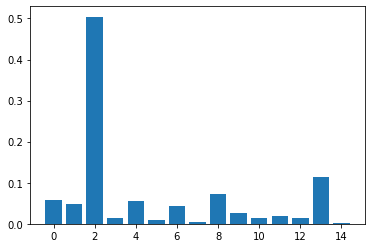

In [80]:
# оцените, какие признаки демонстрируют наибольшую  важность в модели градиентного бустинга
import matplotlib.pyplot  as plt
importance = gb.feature_importances_
for i,v in enumerate(importance):
  print('Feature: %0d, Score: %.5f' % (i,v))
plt.bar([x for x in range(len(importance))], importance)
plt.show()

### Задания 6,7,8

In [81]:
# реализуйте оптимизацию гиперпараметров с помощью Optuna
import optuna

def optuna_rf(trial):
  n_estimators = trial.suggest_int('n_estimators', 100, 200, 1)
  max_depth = trial.suggest_int('max_depth', 10, 30, 1)
  min_samples_leaf = trial.suggest_int('min_samples_leaf', 2, 10, 1)

  model = ensemble.RandomForestClassifier(n_estimators=n_estimators,
                                          max_depth=max_depth,
                                          min_samples_leaf=min_samples_leaf,
                                          random_state=42)
  model.fit(X_train_scaled, y_train)
  score = metrics.f1_score(y_train, model.predict(X_train_scaled))

  return score

study = optuna.create_study()

study.optimize(optuna_rf, n_trials=20)
model = ensemble.RandomForestClassifier(**study.best_params,random_state=42, )
model.fit(X_train_scaled, y_train)
y_train_pred = model.predict(X_train_scaled)

print("accuracy на тестовом наборе: {:.3f}".format(model.score(X_test_scaled, y_test)))
y_test_pred = model.predict(X_test_scaled)
print('f1_score на тестовом наборе: {:.3f}'.format(metrics.f1_score(y_test, y_test_pred)))

[I 2023-02-01 19:03:33,763] A new study created in memory with name: no-name-48bf5896-c224-4ed3-b3da-a26b53e1dcd6
[I 2023-02-01 19:03:44,430] Trial 0 finished with value: 0.8640929064657878 and parameters: {'n_estimators': 177, 'max_depth': 13, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8640929064657878.
[I 2023-02-01 19:03:55,913] Trial 1 finished with value: 0.9171114599686029 and parameters: {'n_estimators': 195, 'max_depth': 19, 'min_samples_leaf': 2}. Best is trial 0 with value: 0.8640929064657878.
[I 2023-02-01 19:04:04,891] Trial 2 finished with value: 0.8785134291068082 and parameters: {'n_estimators': 175, 'max_depth': 27, 'min_samples_leaf': 4}. Best is trial 0 with value: 0.8640929064657878.
[I 2023-02-01 19:04:15,301] Trial 3 finished with value: 0.8537920250195467 and parameters: {'n_estimators': 194, 'max_depth': 21, 'min_samples_leaf': 8}. Best is trial 3 with value: 0.8537920250195467.
[I 2023-02-01 19:04:23,515] Trial 4 finished with value: 0.893989071038251

accuracy на тестовом наборе: 0.824
f1_score на тестовом наборе: 0.813


In [ ]:
# а на платформе надо указать такие!!
# accuracy = 0.84
# f1_score = 0.83